GRSM Data Processing
--------------------



In [1]:
import pandas as pd
from datetime import datetime

In [32]:
# import weather station data

noaa_data = pd.read_csv('222X.DAT', skiprows = 4,  names = pd.read_csv('222X.DAT', nrows = 1, skiprows = 1), low_memory=False)
mask = (noaa_data['TIMESTAMP'] > '2019-10-21 12:00') & (noaa_data['TIMESTAMP'] <= '2019-11-17 16:00')
noaa_data = noaa_data.loc[mask]
noaa_data['TIMESTAMP'] = noaa_data['TIMESTAMP'].apply(datetime.fromisoformat)
noaa_data.to_csv('noaa_data.csv')
noaa_data.head()

,TIMESTAMP,RECORD,site_id,calendar_day,AirTC_Avg,AirTC_Std,AirTC_Max,AirTC_Min,RH_Avg,RH_Max,...,Ozone,ozone_temp_Avg,future_1,future_2,future_3,Gamma_Avg,data_temp_Avg,Batt_Volt_Avg,Batt_Volt_Max,Batt_Volt_Min
156294,2019-10-21 12:00:00,156293,222,294,15.24,0.231,15.57,14.78,75.43,80.50,...,-99,-99,-99,-99,-99,-99,25.8,13.08,13.19,13.02
156295,2019-10-21 12:15:00,156294,222,294,15.34,0.106,15.60,15.09,73.26,79.74,...,-99,-99,-99,-99,-99,-99,25.97,13.08,13.16,13.01
156296,2019-10-21 12:30:00,156295,222,294,15.04,0.079,15.26,14.82,75.06,80.10,...,-99,-99,-99,-99,-99,-99,25.13,13.09,13.11,13.03
156297,2019-10-21 12:45:00,156296,222,294,14.70,0.442,15.33,13.93,81.00,88.20,...,-99,-99,-99,-99,-99,-99,25.21,13.08,13.11,13.02
156298,2019-10-21 13:00:00,156297,222,294,14.85,0.325,15.67,14.00,81.10,87.30,...,-99,-99,-99,-99,-99,-99,24.69,13.08,13.11,13.00


In [19]:
# import sensor data
cbalej = pd.read_csv('20191021_RRMD.TXT', sep = '\t', header = None, names = ['Group', 'Timestamp', 'Temp_C', 'RH_percent', 'P_hPa', 'VOC_arb', 'PM25_ugm3'])
cbalej['Timestamp'] = cbalej['Timestamp'].apply(datetime.fromisoformat)
cbalej.head()

,Group,Timestamp,Temp_C,RH_percent,P_hPa,VOC_arb,PM25_ugm3
0,RRMD,2019-10-21 14:37:29,21.55,62.43,852.17,0.00,4.0
1,RRMD,2019-10-21 14:47:58,21.09,66.84,852.13,5.00,6.0
2,RRMD,2019-10-21 14:58:27,20.47,71.81,852.11,6.92,5.4
3,RRMD,2019-10-21 15:08:56,19.76,72.71,852.11,8.72,4.0
4,RRMD,2019-10-21 15:19:25,19.11,72.80,852.11,10.47,4.2


In [20]:
import matplotlib.pyplot as plt

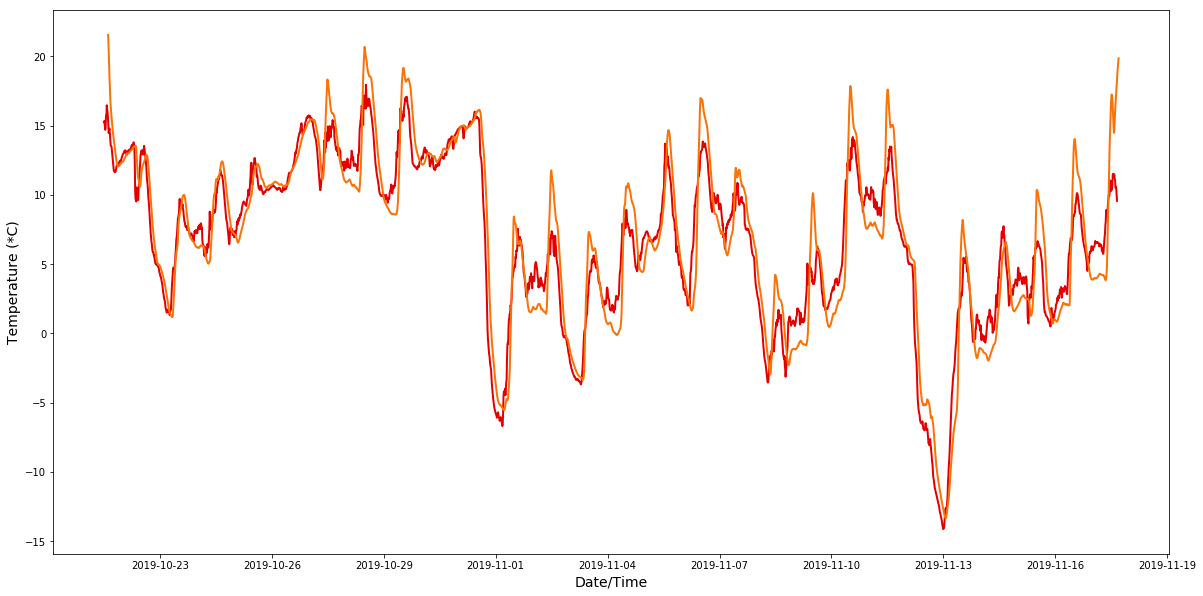

In [21]:
plt.figure(figsize=(20, 10))
plt.plot(noaa_data['TIMESTAMP'], noaa_data['AirTC_Avg'], linewidth = 2, color = 'xkcd:red')
plt.plot(cbalej['Timestamp'], cbalej['Temp_C'], linewidth = 2, color = 'xkcd:orange')
plt.xlabel('Date/Time', fontsize = 14)
plt.ylabel('Temperature (*C)', fontsize = 14)
plt.show()

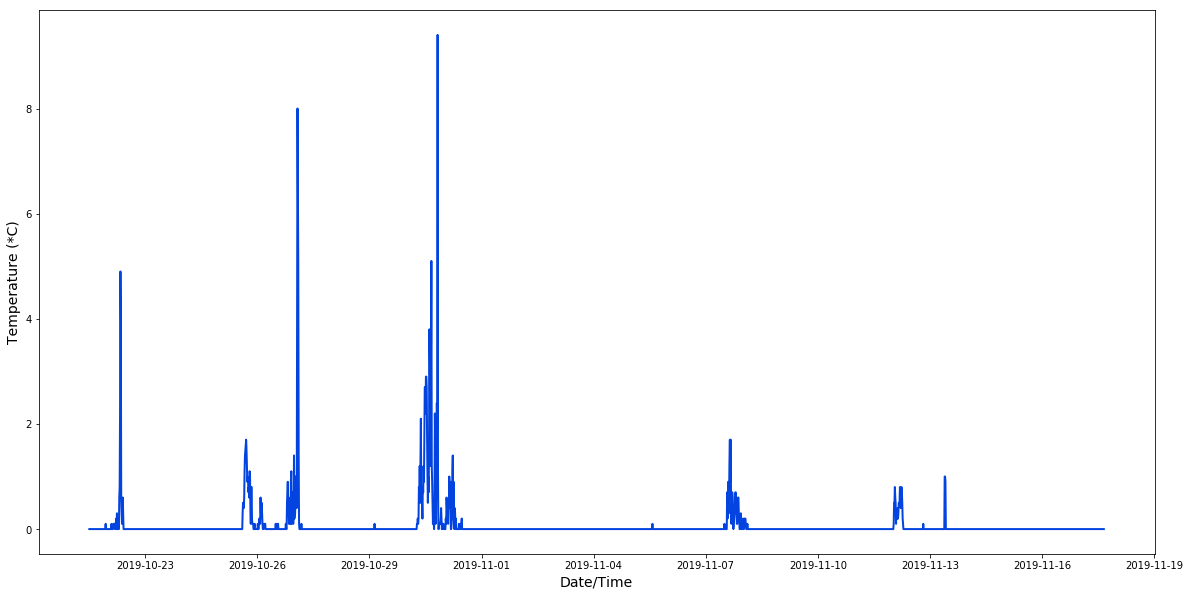

In [18]:
plt.figure(figsize=(20, 10))
plt.plot(noaa_data['TIMESTAMP'], noaa_data['Rain_mm_Tot'], linewidth = 2, color = 'xkcd:blue')
plt.xlabel('Date/Time', fontsize = 14)
plt.ylabel('Temperature (*C)', fontsize = 14)
plt.show()

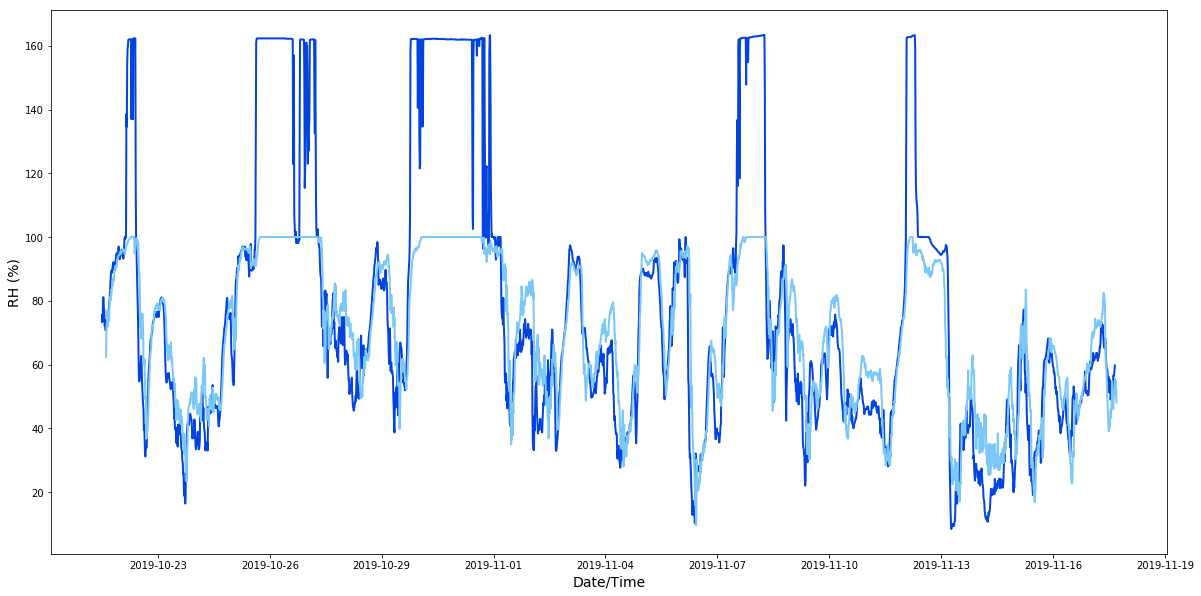

In [28]:
plt.figure(figsize=(20, 10))
plt.plot(noaa_data['TIMESTAMP'], noaa_data['RH_Avg'], linewidth = 2, color = 'xkcd:blue')
plt.plot(cbalej['Timestamp'], cbalej['RH_percent'], linewidth = 2, color = 'xkcd:lightblue')
plt.xlabel('Date/Time', fontsize = 14)
plt.ylabel('RH (%)', fontsize = 14)
plt.show()

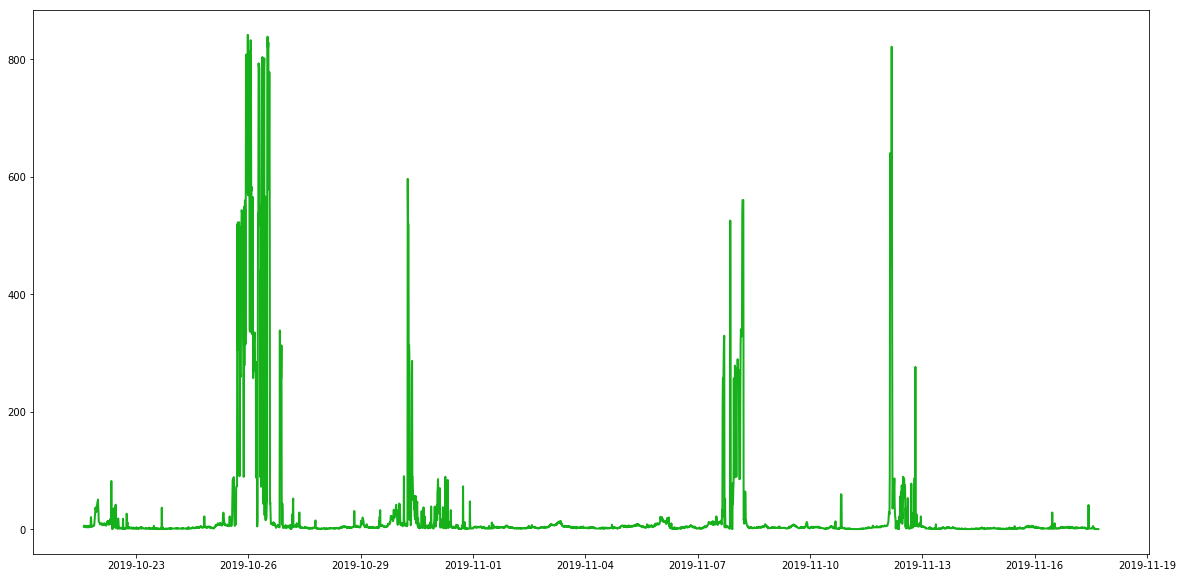

In [29]:
plt.figure(figsize=(20, 10))
plt.plot(cbalej['Timestamp'], cbalej['PM25_ugm3'], linewidth = 2, color = 'xkcd:green')
plt.show()